# ONNX

### Introduction

    ONNX, which stands for Open Neural Network Exchange, is an open standard format for representing machine learning models. 
    It's designed to enable models to be portable and interoperable across different AI frameworks and platforms, such as TensorFlow, PyTorch, and others. 
    This portability allows developers to train a model in one framework, convert it into the ONNX format, 
    and then deploy it in another framework for inference, without the need to rewrite or adjust the model code significantly.


### Basics:

    As an overview, I will briefly outline the necessary steps to create an ONNX model:

1. Develop your model using supported libraries and languages; (if it's not in Python, convert it to Python first. More info is provided later)

2. Export Model to ONNX: Convert your machine learning model from its native framework format to the ONNX format.

3. Use Model in New Environment: Deploy and run the ONNX model in a different programming language or platform.



* <code style="background-color: #800000; color: white;">To make a overvieuw I have made A file where most of the important possible frameworks are listed with there respected language </code>

* #### Can be seen in: #1.Model_Frameworks:

-----------

# The start    
    
    Creating ONNX models doesn't strictly require starting with Python models. Instead, you can directly develop models using the specific syntax and constructs provided by the ONNX framework, which might differ from traditional Python-based machine learning libraries. Therefore, you do not need to make your Python models first (but you can). Converting a model often involves making certain modifications to ensure compatibility for the conversion to Onnx.



* <code style="background-color: #800000; color: white;">When I first started, I made these models beforehand, but that was not a good idea because it required more work after that, so I redid the whole code. Now, in the ONNX syntax</code>

* #### Can be seen in: #2.Python_models:

## Venv is needed !

After a great deal of struggle, I found that a virtual environment is very much needed!

onnx does not work well with influence of other packages or libraries. I have found that only a
stable version like python 3.9 works wel. I also could not use 3.9 in a normal way. I needed to use a venv to isolate the process. 

#### Install Required Packages + Libraries + python venv:

#### Make a venv with python 3.9:

* open cmd

    * cd path\to\your\project

    * python_version_name -m venv name_your_venv

    * if you use vscode use: code .

* vscode

    * .\name_your_venv\Scripts\Activate.ps1




* <code style="background-color: #800000; color: white;">When Creating the venv you can ecounter some problems, here are a few of them:</code>

* #### Can be seen in: #3.Some_ Errors:




#### First, ensure you have the necessary libraries installed in your Python environment:

    for example, If you want to make a model using sklearn

```python
!pip install pandas
```

```python
!pip install sklearn
```

#### Install ONNX and ONNX-specific libraries:

```python
!pip install onnx onnxruntime
```

```python
!pip install onnx skl2onnx
```

```python
!pip install onnx onnxruntime skl2onnx numpy
```

    It should look like this:

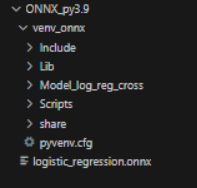

------

## Making the onnx brigde file:

    for example using the Sklearn onnx library:

#### This would be an example of how you would make a onnx file:

In [ ]:
import onnx
import skl2onnx
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np

# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Now we have the trained model and X_train, we can specify the input type and shape for ONNX
initial_type = [('float_input', FloatTensorType([None, X_train.shape[1]]))]

# Convert the trained model to ONNX format
onnx_model = convert_sklearn(model, initial_types=initial_type)

# Save the ONNX model to a file
with open("logistic_regression.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())


* <code style="background-color: #800000; color: white;">This is just a example in the the file below I wil give a universal outline of how to make a model using any framework:</code>

* #### Can be seen in: #4.Making_The_Bridge 


---------

## Using the ONNX model:

    for example, from the sklearn model to a tensorflow model

#### Tensorflow for js:

Download Node.js:

* Go to the Node.js official website and download node.js.


* Initialize a Node.js Project:

    * mkdir my_node_project
    * cd my_node_project
    * npm init -y
    * npm install onnxruntime-node

#### reading out the onnx file:

    Currently this code does not work fully there is something left that I cant seem to solve but the Code should look something like this.

    When the code works eventualy you have succesfully made and used a onnx file.

```js
const ort = require('onnxruntime-node');

// Function to load the ONNX model
async function loadModel(filePath) {
  try {
    const session = await ort.InferenceSession.create(filePath);
    console.log('Model loaded successfully');
    return session;
  } catch (e) {
    console.error('Failed to load model', e);
    throw e;
  }
}

// Function to run the model with input data
async function runModel(session, inputData) {
  try {
    // Create a tensor from the input data
    const inputTensor = new ort.Tensor('float32', inputData, [1, inputData.length]);
    // Prepare the inputs for the model
    const feeds = { [session.inputNames[0]]: inputTensor };
    // Run the model
    const results = await session.run(feeds);
    // Return only the output tensor data
    return results[session.outputNames[0]].data;
  } catch (e) {
    console.error('Failed to run model', e);
    throw e;
  }
}

// Example input data (should match the feature size of Iris dataset, which is 4)
const sampleInputData = new Float32Array([5.1, 3.5, 1.4, 0.2]);

// Main function to load and run the model
async function main() {
  const modelFilePath = 'logistic_regression.onnx'; // Path to the ONNX model file
  const session = await loadModel(modelFilePath);
  const output = await runModel(session, sampleInputData);
  console.log('Model output:', output);
}

main().catch(console.error);
```

### Universal Guide:

* <code style="background-color: #800000; color: white;">In the file below you can find a general guide on how to use a onnx file </code>

* #### Can be seen in: #5.Using_the_ONNX

----------

## ONNX in Other languages:

    I have made a few general guides for other languages as python.

    

* <code style="background-color: #800000; color: white;">In the file below you will find a general guide on how to make a onnx file from R </code>

* #### Can be seen in: #R_to_ONNX

* <code style="background-color: #800000; color: white;">In the file below you can find a guide of how to convert a c++ model to an onnx file </code>

* #### Can be seen in: #4.C++_To_ONNX